<font size=4 color='blue'>
   
# Método de Newton-Raphson

<font size=4>

El método de Newton-Rapshon se usa para encontrar las raíces de una función real. 

Se parte de la derivada de la función $f$ y una suposición inicial $x_0$ para una raíz de $f$. Si la función satisface suposiciones suficientes y la suposición inicial es cercana, entonces se mejora la aproximación de la raíz con:

$$ x_1 = x_0 - \dfrac{f(x_0)}{f´(x_0)}$$

$(x_1, 0)$ es la intersección del eje $x$ y la tangente de la gráfica de $f$ en $(x_0, f(x_0))$.

[Newton´s method](https://en.wikipedia.org/wiki/Newton%27s_method)


<img src = "NewtonIteration_Ani.gif">

(By Ralf Pfeifer - de:Image:NewtonIteration Ani.gif, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=2268473)

<font size =4>

Si el método se aplica a la derivada de una funcion $f$, es decir, se aplica a $f'$, entonces se pueden hallar los mínimos o máximos de $f$. 

[Newton´s method in optimization](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization#Newton's_Method)

In [1]:
def newton(f,Df,x0,epsilon,max_iter):
    '''Approximate solution of f(x)=0 by Newton's method.

    Parameters
    ----------
    f : function
        
    Df : Derivative of f(x).
    
    x0 : Initial guess for a solution f(x)=0.
    
    epsilon :Stopping criteria is abs(f(x)) < epsilon.
    
    max_iter : Maximum number of iterations of Newton's method.

    Returns
    -------
    xn : number
        Implement Newton's method: compute the linear approximation
        of f(x) at xn and find x intercept by the formula
            x = xn - f(xn)/Df(xn)
        Continue until abs(f(xn)) < epsilon and return xn.
        If Df(xn) == 0, return None. If the number of iterations
        exceeds max_iter, then return None.
    '''
    
    aprox_root = [x0]
    
    xn = x0
      
    # xn es la aproximación de la raíz de f. Inicialmente xn =x0 con x0 la primera aproximación
    
    for n in range(0,max_iter):
        
        fxn = f(xn)
        
        if abs(fxn) < epsilon:
            
            print('Found solution after',n,'iterations.')
            
            return xn, aprox_root
        
        Dfxn = Df(xn)
        
        if Dfxn == 0:
            
            print('Zero derivative. No solution found.')
            
            return None
        
        xn = xn - fxn/Dfxn
        
        aprox_root.append(xn)
        
    print('Exceeded maximum iterations. No solution found.')
    
    return None

In [2]:
p = lambda x: (x-1)**2 - 1
Dp = lambda x: 2*(x-1)

newton(p, Dp,10,1e-10,10)

Found solution after 7 iterations.


(2.0000000000007883,
 [10,
  5.555555555555555,
  3.3875338753387534,
  2.403188050041681,
  2.0579254518635564,
  2.0015858196660674,
  2.000001255421135,
  2.0000000000007883])

In [3]:
 def tangent_line(f,Df, x_0,a,b):
    x = np.linspace(a,b)
    y = f(x) 
    y_0 = f(x_0)
    y_tan = Dp(x_0) * (x - x_0) + y_0 
   
  #plotting
    plt.plot(x,y,'r-')
    plt.plot(x,y_tan,'b-')
    plt.axis([a,b,a,b])
    plt.xlabel('x')     
    plt.ylabel('y')  
    plt.grid(True)
    plt.title('Plot of a function with tangent line') 
    plt.show()  

Found solution after 8 iterations.
13


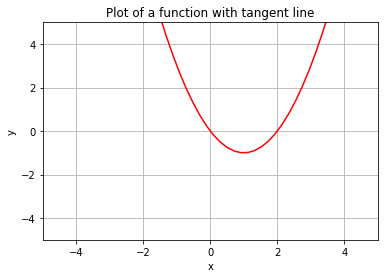

7.041666666666667


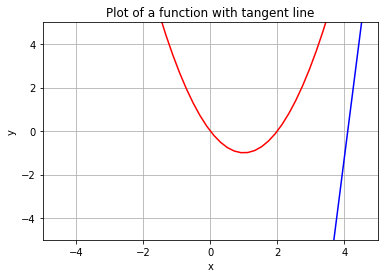

4.103591954022988


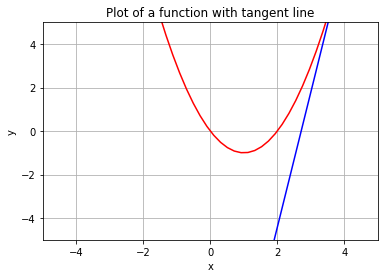

2.7128996296201695


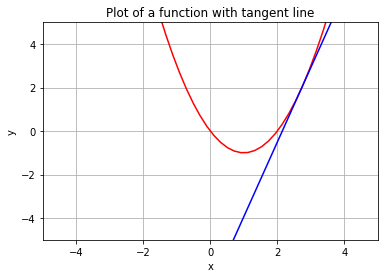

2.14835249921365


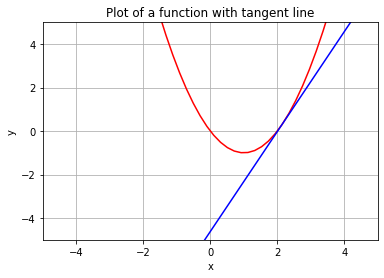

2.009582625560534


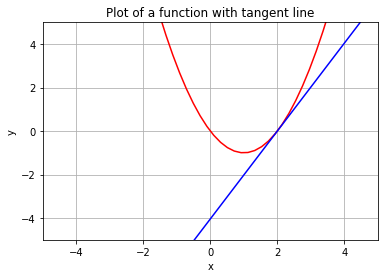

2.00004547756187


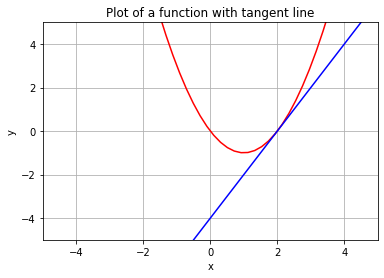

2.0000000010340573


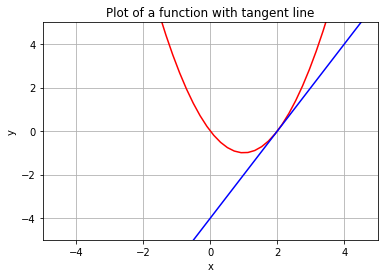

2.0


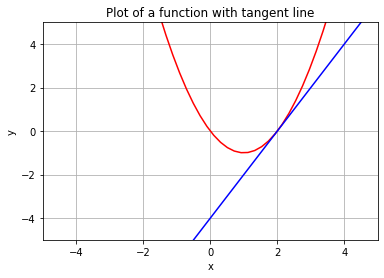

In [5]:
p = lambda x: (x-1)**2 - 1
Dp = lambda x: 2*(x-1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

for i in newton(p, Dp,13,1e-10,10)[1]:
    
    print(i)

    tangent_line(p, Dp, i, -5, 5)

# Gradient Descent

Es un algoritmo de optimizacion para encontrar el minimo local de una funcion diferenciable.

Para encontrar un mínimo local de una función usando el descenso de gradiente, se toman pasos proporcionales al negativo del gradiente (o gradiente aproximado) de la función en el punto actual.

[Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent)


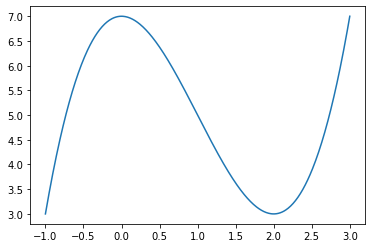

In [6]:
f = lambda x: x**3 - 3*x**2 + 7
x = np.linspace(-1,3,500)
plt.plot(x, f(x))
plt.show()

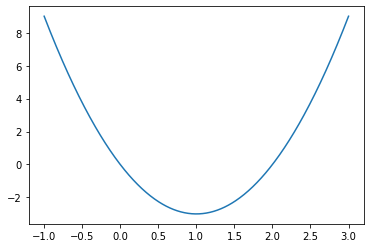

In [7]:
df = lambda x: 3*x**2 - 6*x
x = np.linspace(-1,3,500)
plt.plot(x, df(x))
plt.show()

In [8]:
next_x = 6  # We start the search at x=6
gamma = 0.01  # Step size multiplier
precision = 0.00001  # Desired precision of result
max_iters = 10000  # Maximum number of iterations


xs = [next_x]

for _i in range(max_iters):
    
    current_x = next_x
    
    next_x = current_x - gamma * df(current_x)
    
    xs.append(next_x)

    step = next_x - current_x
    
    if abs(step) <= precision:
        
        break
        
print("Minimum at {0:5.2f}".format(next_x))

# The output for the above will be something like
# "Minimum at 2.2499646074278457"

Minimum at  2.00


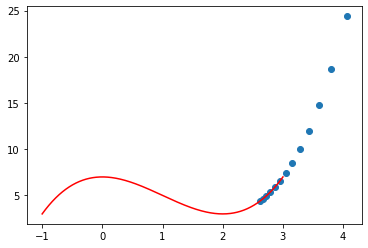

In [9]:
plt.plot(x, f(x), 'red')
xs = np.asarray(xs[4:17])
plt.scatter(xs, f(xs))
#plt.xlim([0, 1])

plt.show()


[Implement Gradient Descent in Python: towards data science](https://towardsdatascience.com/implement-gradient-descent-in-python-9b93ed7108d1)

[Implementation of Gradient Descent in Python: medium](https://medium.com/coinmonks/implementation-of-gradient-descent-in-python-a43f160ec521)

[Linear Regression using Gradient Descent](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931)

[Video Ng](https://www.youtube.com/watch?v=TuttBDdbls8&t=122s)

___

# Ejemplo

## Ajuste de un pico de difracción de rayos X con una Gaussiana usando el metodo de Newton-Raphson:

In [10]:
X = []
Y = []

fopen = open('diffraction-pattern.xy')

fread = fopen.readlines()

for j in range(len(fread)):
    
    sample = fread[j].split()

    X.append(float(sample[0]))
    Y.append(float(sample[1]))

X_array = np.asarray(X)
Y_array = np.asarray(Y)


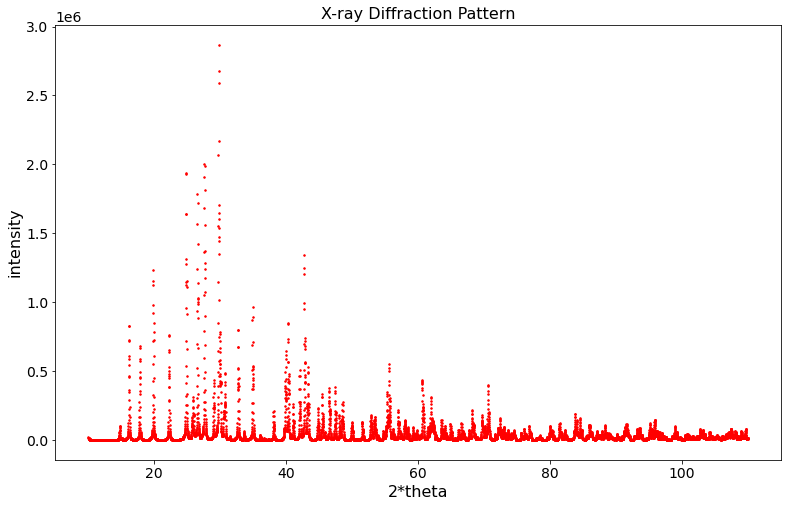

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,8))

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=16)

plt.plot(X_array, Y_array, '.', color='red', markersize=3)
plt.ylabel('intensity', fontsize=16)
plt.xlabel('2*theta', fontsize=16)

plt.title('X-ray Diffraction Pattern', fontsize=16)
plt.show()

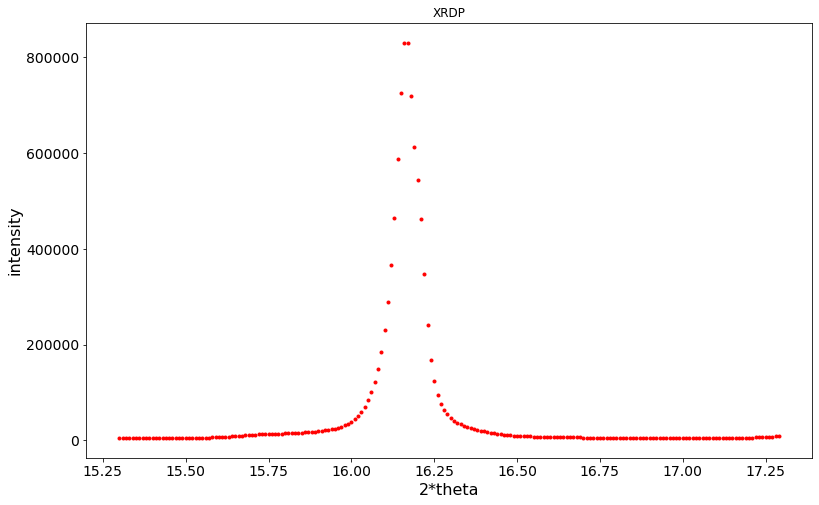

In [12]:
import matplotlib.pyplot as plt

x_ = X_array[530:730]
y_ = Y_array[530:730]

plt.figure(figsize=(13,8))

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=16)

plt.plot(x_, y_, '.', color='red', markersize=6)
plt.ylabel('intensity', fontsize=16)
plt.xlabel('2*theta', fontsize=16)
 
plt.title('XRDP')
plt.show()

<font size=4>
    
Ajustando a los datos una curva Gaussiana

[7.59197754e+05 1.61668786e+01 4.33208852e-02]
[[ 8.31901525e+07  1.75966837e-05 -3.16456316e+00]
 [ 1.75966837e-05  3.61141078e-07 -1.00392358e-12]
 [-3.16456316e+00 -1.00392358e-12  3.61141072e-07]]


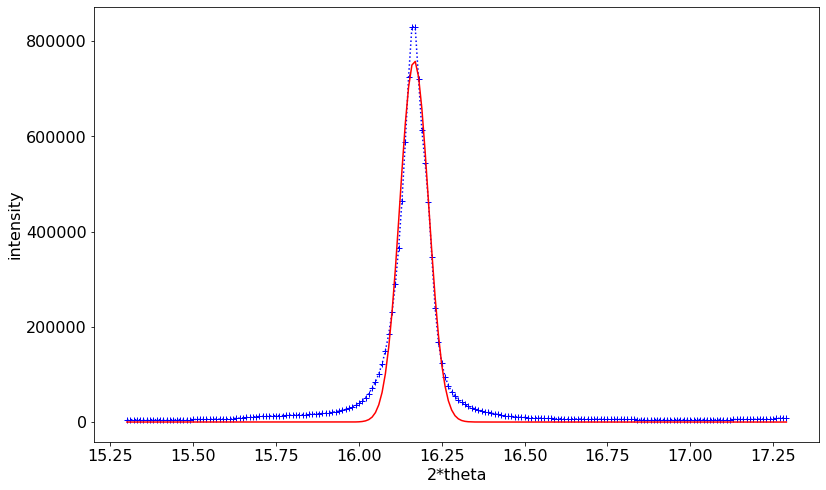

In [13]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

# weighted arithmetic mean (corrected - check the section below)
mean = sum(x_ * y_) / sum(y_)
sigma = np.sqrt(sum(y_ * (x_ - mean)**2) / sum(y_))

def Gauss(x_, a, x0, sigma):
    return a * np.exp(-(x_ - x0)**2 / (2 * sigma**2))

popt,pcov = curve_fit(Gauss, x_, y_, p0=[max(y_), mean, sigma])

print(popt)
print(pcov)

plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)

plt.plot(x_, y_, 'b+:', label='data')
plt.plot(x_, Gauss(x_, *popt), 'r-', label='fit')
plt.ylabel('intensity', fontsize=16)
plt.xlabel('2*theta', fontsize=16)

plt.show()

<font size=4>
    
Ajustando a los datos una curva Lorentziana

[1.06664566e+05 1.61666300e+01 8.06882299e-02]
[[ 5.51845268e+05 -1.07422315e-06  4.17502218e-01]
 [-1.07422315e-06  7.89273880e-08 -1.79933357e-12]
 [ 4.17502218e-01 -1.79933357e-12  6.31592875e-07]]


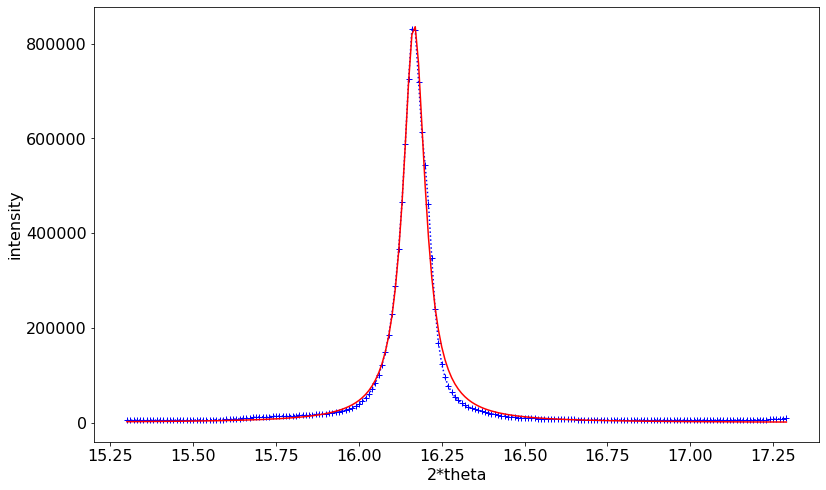

In [14]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

# weighted arithmetic mean (corrected - check the section below)
mean = sum(x_ * y_) / sum(y_)
sigma = np.sqrt(sum(y_ * (x_ - mean)**2) / sum(y_))

def Lorentzian(x_, a, x0, sigma):
    
    return (a /3.14159 ) * ((sigma/2) / ((x_-x0)**2 + (sigma/2)**2))

popt,pcov = curve_fit(Lorentzian, x_, y_, p0=[max(y_), mean, sigma])

print(popt)
print(pcov)

plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)

plt.plot(x_, y_, 'b+:', label='data')
plt.plot(x_, Lorentzian(x_, *popt), 'r-', label='fit')
plt.ylabel('intensity', fontsize=16)
plt.xlabel('2*theta', fontsize=16)

plt.show()


[from scipy.optimize import curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

___